<a href="https://colab.research.google.com/github/Gail529/LDA-Topic-Modelling/blob/master/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#TOPICMODELLING
import gensim
from gensim import corpora

#text preprocessing 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import string
import re
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import datetime as dt
import matplotlib.dates as mdates



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
data=pd.read_csv('/content/Airbnb_Texas_Rentals.csv')
data.head(5)

,Unnamed: 0,average_rate_per_night,bedrooms_count,city,date_of_listing,description,latitude,longitude,title,url
0,1,$27,2,Humble,May 2016,Welcome to stay in private room with queen bed...,30.020138,-95.293996,2 Private rooms/bathroom 10min from IAH airport,https://www.airbnb.com/rooms/18520444?location...
1,2,$149,4,San Antonio,November 2010,"Stylish, fully remodeled home in upscale NW – ...",29.503068,-98.447688,Unique Location! Alamo Heights - Designer Insp...,https://www.airbnb.com/rooms/17481455?location...
2,3,$59,1,Houston,January 2017,'River house on island close to the city' \nA ...,29.829352,-95.081549,River house near the city,https://www.airbnb.com/rooms/16926307?location...
3,4,$60,1,Bryan,February 2016,Private bedroom in a cute little home situated...,30.637304,-96.337846,Private Room Close to Campus,https://www.airbnb.com/rooms/11839729?location...
4,5,$75,2,Fort Worth,February 2017,Welcome to our original 1920's home. We recent...,32.747097,-97.286434,The Porch,https://www.airbnb.com/rooms/17325114?location...


In [ ]:
missing_values=data.isnull().sum()
dtypes=data.dtypes
shape=data.shape
info=data.info()
print('missing_values',missing_values)
print('datatypes',dtypes)
print('Shape',shape)
print('Info',info)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18259 entries, 0 to 18258
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              18259 non-null  int64  
 1   average_rate_per_night  18231 non-null  object 
 2   bedrooms_count          18256 non-null  object 
 3   city                    18259 non-null  object 
 4   date_of_listing         18259 non-null  object 
 5   description             18257 non-null  object 
 6   latitude                18225 non-null  float64
 7   longitude               18225 non-null  float64
 8   title                   18256 non-null  object 
 9   url                     18259 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.4+ MB
missing_values Unnamed: 0                 0
average_rate_per_night    28
bedrooms_count             3
city                       0
date_of_listing            0
description                2
lati

In [ ]:
data['bedrooms_count'].unique()
data['city'].nunique

505

In [ ]:
data['average_rate_per_night']=data['average_rate_per_night'].astype(str)
data['average_rate_per_night']=data['average_rate_per_night'].str.replace('$','')
data['average_rate_per_night']=data['average_rate_per_night'].str.replace(',','')
data['average_rate_per_night']=data['average_rate_per_night'].str.replace('%','')
data['average_rate_per_night']=data['average_rate_per_night'].str.replace('.','')
data['average_rate_per_night']=data['average_rate_per_night'].astype(float)


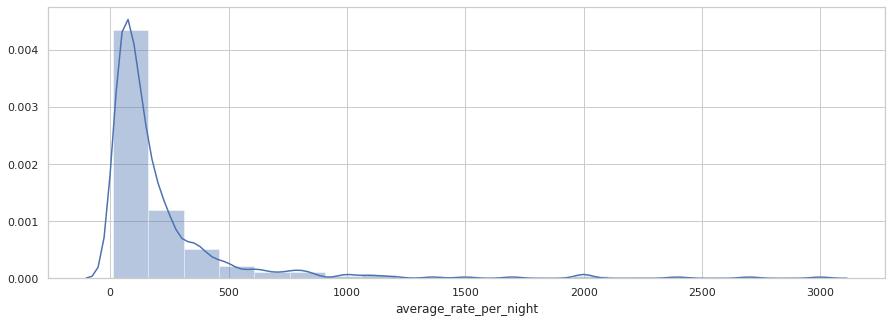

In [ ]:
sns.set(style='whitegrid',color_codes=True,palette='deep')
plt.figure(figsize=(15,5))
sns.distplot(data['average_rate_per_night'].head(500),bins=20)


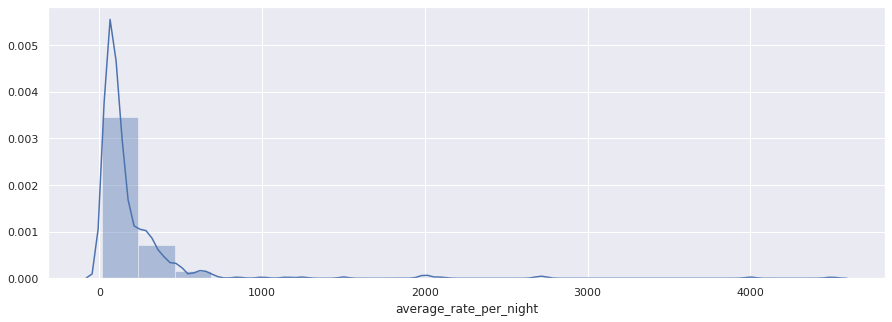

In [ ]:
sns.set(style='darkgrid',color_codes=True,palette='deep')
plt.figure(figsize=(15,5))
sns.distplot(data['average_rate_per_night'].tail(500),bins=20)


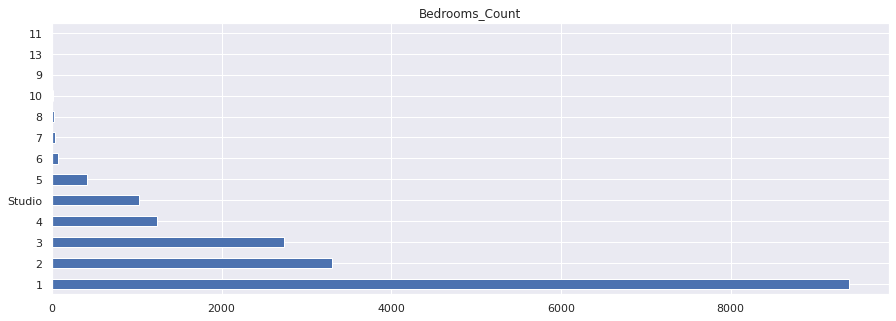

In [ ]:
plt.title('Bedrooms_Count')
data['bedrooms_count'].value_counts().plot(kind='barh',figsize=(15,5))
sns.set(style='darkgrid',color_codes=True,palette='deep')
plt.show()


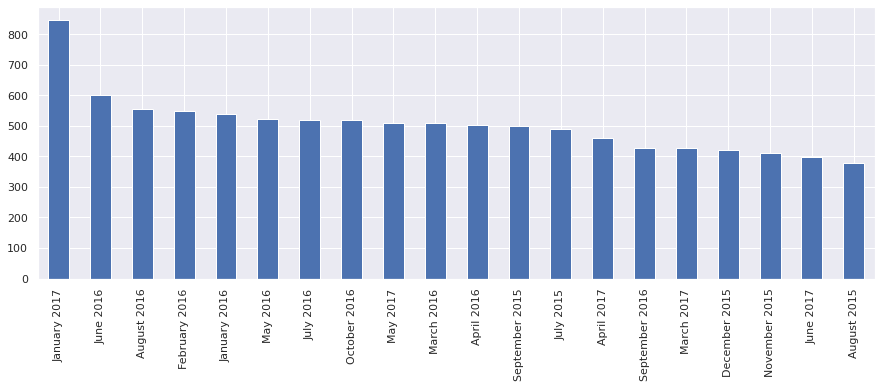

In [ ]:
data['date_of_listing'].value_counts().head(20).plot(kind='bar',figsize=(15,5))


In [10]:
description=data['description']
description

0        [[welcome, stay, private, room, queen, bed, de...
1        [[stylish, fully, remodeled, home, upscale, nw...
2        [[river, house, island, close, city, na, well,...
3        [[private, bedroom, cute, little, home, situat...
4        [[welcome, original, home, recently, purchased...
                               ...                        
18254    An entire 1 bedroom 700+sqft condo in the hear...
18255    An inviting 1920's cottage home in a popular u...
18256    Amazing 3BHK Apartment in a picturesque Commun...
18257    My quaint and cozy home is conveniently locate...
18258    Cute brand new, modern, guest house (we call i...
Name: description, Length: 18259, dtype: object

In [13]:
#preprocessing the description column
for i in range(0,len(description)):
    text=description[i]
   # text=re.sub(r'\d+','',text)#removing numbers
    #lowercasing
    #lowercased_text=text.lower()

    #punctuation removal 
    def  remove_punctuation(word): #function will take in the lowercased text and then remove all the punctuation
        translator=str.maketrans('','',string.punctuation)
        text_punct=word.translate(translator)
        return text_punct
    result=remove_punctuation(text) #storing the resulting body of  text in variable result

    

    #removing stopwords 
    def remove_stopwords(word):#The function will  tokenize the result and then filter off  the stop_words 
        stop_words=set(stopwords.words("english")) 
        word_tokens= word_tokenize(word)
        result=[word for word in word_tokens if word not in stop_words ]
        return result

    desc=[remove_stopwords(result)]
    #replacing the values of the lyrics column in the dataframe with the  preprocessed  lyrics
    data.iat[i,5]=desc
    

AttributeError: ignored